## NLP Final - Notebook #3 (NER & Entity Sentiment Analysis)
Author: Natalie Kim

Quarter: Winter 2025

In [1]:
import pandas as pd
df = pd.read_csv("df_subset_with_topics.csv")
df.head(5)

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic
0,https://www.dailymaverick.co.za/article/2024-0...,2024-02-26,Middle East crisis update Palestinian Authorit...,middle east crisis update palestinian authorit...,Middle East crisis update: Palestinian Authori...,middle east crisis update palestinian authorit...,middle east crisis update palestinian authorit...,middle east crisis update palestinian authorit...,-1
1,https://www.devdiscourse.com/article/technolog...,2023-05-09,Alphabetbacked Anthropic outlines the moral va...,alphabetbacked anthropic outlines the moral va...,Alphabet-backed Anthropic outlines the moral v...,alphabet backed anthropic outlines the moral v...,alphabetbacked anthropic outlines the moral va...,alphabetbacked anthropic outlines moral values...,-1
2,https://www.kbzk.com/tech-giants-commit-to-bid...,2023-07-21,Tech giants commit to Biden administrationbrok...,tech giants commit to biden administrationbrok...,Tech giants commit to Biden administration-bro...,tech giants commit to biden administration bro...,tech giants commit to biden administrationbrok...,tech giants commit biden administrationbrokere...,5
3,https://siouxcityjournal.com/news/national/how...,2022-09-28,How do you even cheat in chess Artificial inte...,how do you even cheat in chess artificial inte...,How do you even cheat in chess? Artificial int...,how do you even cheat in chess artificial inte...,how do you even cheat in chess artificial inte...,even cheat chess artificial intelligence morse...,9
4,https://www.cbsnews.com/boston/news/artificial...,2023-02-09,Artificial Intelligence is being studied to im...,artificial intelligence is being studied to im...,Artificial Intelligence is being studied to im...,artificial intelligence is being studied to im...,artificial intelligence is being studied to im...,artificial intelligence studied improve cancer...,1


In [4]:
df.shape

(19889, 9)

In [44]:
# filtering for only relevant topics to find technologies
topics_to_remove = [-1, 13, 16, 25, 6]

df_aitopics = df[~df['topic'].isin(topics_to_remove)].copy()
df_aitopics.shape

(10152, 9)

In [46]:
# combine text and titles
df_aitopics['textandtitle_clean'] = df_aitopics['title_clean'] + ' ' + df_aitopics['text_clean_ner']
df_aitopics.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean
2,https://www.kbzk.com/tech-giants-commit-to-bid...,2023-07-21,Tech giants commit to Biden administrationbrok...,tech giants commit to biden administrationbrok...,Tech giants commit to Biden administration-bro...,tech giants commit to biden administration bro...,tech giants commit to biden administrationbrok...,tech giants commit biden administrationbrokere...,5,Tech giants commit to Biden administrationbrok...
3,https://siouxcityjournal.com/news/national/how...,2022-09-28,How do you even cheat in chess Artificial inte...,how do you even cheat in chess artificial inte...,How do you even cheat in chess? Artificial int...,how do you even cheat in chess artificial inte...,how do you even cheat in chess artificial inte...,even cheat chess artificial intelligence morse...,9,How do you even cheat in chess Artificial inte...
4,https://www.cbsnews.com/boston/news/artificial...,2023-02-09,Artificial Intelligence is being studied to im...,artificial intelligence is being studied to im...,Artificial Intelligence is being studied to im...,artificial intelligence is being studied to im...,artificial intelligence is being studied to im...,artificial intelligence studied improve cancer...,1,Artificial Intelligence is being studied to im...
9,https://www.kbtx.com/prnewswire/2023/07/31/asi...,2023-07-31,ASIGs Technological Center of Excellence Advan...,asigs technological center of excellence advan...,ASIG's Technological Center of Excellence Adva...,asig technological center of excellence advanc...,asigs technological center of excellence advan...,asigs technological center excellence advances...,4,ASIGs Technological Center of Excellence Advan...
11,https://www.devdiscourse.com/article/technolog...,2023-05-22,TCS partners with Google Cloud for generative ...,tcs partners with google cloud for generative ...,TCS partners with Google Cloud for generative ...,tcs partners with google cloud for generative ...,tcs partners with google cloud for generative ...,tcs partners google cloud generative ai offeri...,4,TCS partners with Google Cloud for generative ...


In [6]:
import spacy
from spacy import displacy

from collections import Counter
from pandarallel import pandarallel

In [7]:
spacy.__version__

'3.8.4'

In [8]:
import time
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [9]:
import multiprocessing as mp
num_processors = mp.cpu_count()
print(f"Number of CPU processors: {num_processors}")

workers = num_processors-1
print(f'Using {workers} workers')

Number of CPU processors: 8
Using 7 workers


In [12]:
pandarallel.initialize(nb_workers=workers, progress_bar=True)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


### Identifying New Technologies and AI Advancements

In [39]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 19.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [55]:
# Load SpaCy model
# nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_md")
# nlp = spacy.load("en_core_web_lg")
# nlp = spacy.load("en_core_web_trf")

#### Baseline NER

In [56]:
# baseline ner
def extract_entities(text):
    doc = nlp(text)
    
    labels = {"ORG", "PRODUCT"}
    
    entities = {label: [] for label in labels}
    
    for ent in doc.ents:
        if ent.label_ in labels:
            entities[ent.label_].append(ent.text)
    
    return entities

In [57]:
%%time

# applying to dataframe
df_aitopics['entities'] = df_aitopics['textandtitle_clean'].parallel_apply(extract_entities)

CPU times: user 1.49 s, sys: 562 ms, total: 2.05 s
Wall time: 1min 51s


In [63]:
# new df for top entities
labels = ['ORG', 'PRODUCT']
counters = {label: Counter() for label in labels}

for entities in df_aitopics['entities']:
    for label in labels:
        if label in entities:
            counters[label].update(entities[label])

top_entities = {label: [entity for entity, count in counters[label].most_common(40)] for label in labels}

max_len = max(len(lst) for lst in top_entities.values())

data = {}
for label in labels:
    padded = top_entities[label] + [""] * (max_len - len(top_entities[label]))
    data[label] = padded

df_top = pd.DataFrame(data)
df_top

,ORG,PRODUCT
0,GPT,Windows
1,Microsoft,CRM
2,AI,Excel
3,Chat GPT,Windows 11
4,Google,Produkt
5,Apple,Discovery
6,Gray Media Group,Twitter
7,"Gray Television, Inc.",discovery
8,PRNewswire,YouTube
9,"Gray Media Group, Inc.",Facebook


### Topic/Industry Specific Technologies

In [ ]:
# topic dictionary
topic_dict = {
  0: "AI impact on Market",
  1: "Image & Video",
  2: "Healthcare",
  3: "Business",
  4: "ChatGPT",
  5: "Nvidia",
  7: "Artificial Intelligence",
  8: "Sports",
  10: "Education",
  11: "Energy",
  12: "Cybersecurity",
  13: "Smart Devices",
  15: "Music",
  17: "Retail",
  19: "Film & Actors",
  21: "Driving & Vehicles",
  22: "Open AI",
  23: "Financial Fraud",
  24: "Legal",
  26: "Data Scientists (jobs)"
}

In [60]:
top_entities_by_topic = {}

for topic, group in df_aitopics.groupby('topic'):
    org_counter = Counter()
    prod_counter = Counter()
    for ent in group['entities']:
        if isinstance(ent, dict):
            if "ORG" in ent:
                org_counter.update(ent["ORG"])
            if "PRODUCT" in ent:
                prod_counter.update(ent["PRODUCT"])
    # Extract the top 10 for each category
    top_orgs = [entity for entity, count in org_counter.most_common(10)]
    top_products = [entity for entity, count in prod_counter.most_common(10)]
    top_entities_by_topic[topic] = {"ORG": top_orgs, "PRODUCT": top_products}

In [61]:
from IPython.display import display, Markdown

In [62]:
# displaying top 10 entities for each topic
for topic, topic_name in topic_dict.items():
    if topic in top_entities_by_topic:
        # Retrieve lists for ORG and PRODUCT
        org_list = top_entities_by_topic[topic].get("ORG", [])
        prod_list = top_entities_by_topic[topic].get("PRODUCT", [])
        # Ensure both lists have 10 items (pad with empty strings if necessary)
        max_len = 10
        org_list += [""] * (max_len - len(org_list))
        prod_list += [""] * (max_len - len(prod_list))
        df_topic = pd.DataFrame({
            "ORG": org_list,
            "PRODUCT": prod_list
        }, index=[f"Rank {i+1}" for i in range(max_len)])
        
        # Display a header with the human-readable topic name and the topic number.
        display(Markdown(f"### {topic_name} (Topic {topic})"))
        display(df_topic)

### Finance/Markets (Topic 0)

,ORG,PRODUCT
Rank 1,dpiLarge JPEG,Share
Rank 2,AI Premium Photo,Printers Mysore Prajavani
Rank 3,AI,Windows
Rank 4,JPEG Banner JPEG 1200,YouTube
Rank 5,AI Free Photo,Kashi
Rank 6,Google,Edition 106
Rank 7,AI Free Photo Illustration,Excel
Rank 8,Air India,OnePlus
Rank 9,Microsoft,Linux
Rank 10,GPT,Facebook


### Image & Video (Topic 1)

,ORG,PRODUCT
Rank 1,Gray Media Group,Discovery
Rank 2,"Gray Media Group, Inc.",discovery
Rank 3,"Gray Television, Inc.",2.ai
Rank 4,PRNewswire,CoLumbo
Rank 5,AI,Viz.ai
Rank 6,FDA,UsAdvertise
Rank 7,Healthcare,Twitter
Rank 8,FCC,Cetaphil
Rank 9,GPT,Merveille.ai
Rank 10,Microsoft,2027


### Healthcare (Topic 2)

,ORG,PRODUCT
Rank 1,Microsoft,CRM
Rank 2,IBM,2 O.ai
Rank 3,Nvidia,Excel
Rank 4,NYSE,NowUnlimited Rs 120
Rank 5,Amazon,Bond GPT
Rank 6,AI,COVID-19
Rank 7,Google,GMT Office Hours Call
Rank 8,Smart Portfolio,Neptune Pine back
Rank 9,Intel,S P 500
Rank 10,CAGR,Facebook X YouTube


### Business (Topic 3)

,ORG,PRODUCT
Rank 1,GPT,Windows
Rank 2,Microsoft,Windows 11
Rank 3,Chat GPT,Excel
Rank 4,Altman,Twitter
Rank 5,Google,YouTube
Rank 6,AI,MX CA
Rank 7,Bing,Cassie
Rank 8,Copilot,Altman
Rank 9,Apple,Zenbook S
Rank 10,Android,GPT-4


### ChatGPT (Topic 4)

,ORG,PRODUCT
Rank 1,AI,CRM
Rank 2,Gray Media Group,Pearson
Rank 3,PRNewswire,AR 72401870 931-8888 Public Inspection Filepub...
Rank 4,"Gray Television, Inc.",Excel
Rank 5,"Gray Media Group, Inc.",Windows 11
Rank 6,Microsoft,UsAdvertise
Rank 7,GPT,Twitter
Rank 8,FCC,Windows
Rank 9,"Gray Media Group, Inc. Station",F 5
Rank 10,Google Cloud,Linux


### Nvidia (Topic 5)

,ORG,PRODUCT
Rank 1,AI,Trump s
Rank 2,Congress,Facebook
Rank 3,Google,DeSantis
Rank 4,AP,Twitter
Rank 5,GPT,Precip
Rank 6,Chat GPT,appSubstack
Rank 7,Microsoft,Axios
Rank 8,White House,Excel
Rank 9,the White House,Discovery
Rank 10,NPR,Air Force One


### Artificial Intelligence (Topic 7)

,ORG,PRODUCT
Rank 1,Chat GPT,K-12
Rank 2,GPT,Turnitin
Rank 3,AI,GPT Zero
Rank 4,Gray Media Group,Pearson
Rank 5,"Gray Television, Inc.",CoRise
Rank 6,PRNewswire,Share
Rank 7,"Gray Media Group, Inc.",ZuAI
Rank 8,FCC,Excel
Rank 9,Mastercard,Discovery
Rank 10,Microsoft,mathgpt.photostudy.coMath GPT


### Sports (Topic 8)

,ORG,PRODUCT
Rank 1,Apple,Windows
Rank 2,Samsung,Windows 11
Rank 3,Google,Linux
Rank 4,Microsoft,CMOS
Rank 5,GPT,iPhones
Rank 6,Apple Intelligence,Excel
Rank 7,AI,InStyle
Rank 8,iPhone,Notes
Rank 9,Amazon,Smartphone
Rank 10,Chat GPT,Bionic


### Education (Topic 10)

,ORG,PRODUCT
Rank 1,Baidu,DeepSeek
Rank 2,AI,Excel
Rank 3,Huawei,Love Island
Rank 4,AP,Ricketts
Rank 5,GPT,SoM
Rank 6,Google,Twitter
Rank 7,Chat GPT,Zetrix
Rank 8,Nvidia,Xi
Rank 9,TikTok,Sputnik
Rank 10,Apple,Kunlun Tech


### Energy (Topic 11)

,ORG,PRODUCT
Rank 1,Microsoft,Subscribe Sign
Rank 2,Google,agoBusiness
Rank 3,GPT,Windows
Rank 4,Chat GPT,Excel
Rank 5,AI,Twitter
Rank 6,Nvidia,YouTube
Rank 7,Apple,S P 500
Rank 8,TATA,Rabbit
Rank 9,Amazon,Cancel
Rank 10,EMI,businesslive.co.za


### Cybersecurity (Topic 12)

,ORG,PRODUCT
Rank 1,Spotify,YouTube
Rank 2,AI,OnePlus
Rank 3,TikTok,Pro Music Rights
Rank 4,Google,Music Video MV.DREAM MUSIC PRODUCTIONS AND URBAN
Rank 5,Pendo,YouTube Music AI Incubator
Rank 6,Gray Media Group,Atlas 2
Rank 7,"Gray Television, Inc.",Weeknd
Rank 8,YouTube,Twitter
Rank 9,PRNewswire,Pro Music Rights'
Rank 10,Udio,Tavus


### Music (Topic 15)

,ORG,PRODUCT
Rank 1,Microsoft,Linux
Rank 2,AI,Windows
Rank 3,Darktrace,Red Teaming
Rank 4,Gray Media Group,Splunk
Rank 5,PRNewswire,Windows 10
Rank 6,"Gray Television, Inc.",Vectra AI
Rank 7,"Gray Media Group, Inc.",OnSolve
Rank 8,Chat GPT,Vectra AI s
Rank 9,GPT,Vectra
Rank 10,FCC,Windows 11


### Retail (Topic 17)

,ORG,PRODUCT
Rank 1,AI,Schneider
Rank 2,Microsoft,Constellation
Rank 3,Google,S-Series
Rank 4,Gray Media Group,kWh
Rank 5,Amazon,Discovery Feed
Rank 6,SAS,Deep
Rank 7,"Gray Television, Inc.",Share
Rank 8,PRNewswire,Green Quadrant: Energy Management Software
Rank 9,"Gray Media Group, Inc.",Pearson
Rank 10,SAS Grid,Facebook


### Film & Actors (Topic 19)

,ORG,PRODUCT
Rank 1,Gray Media Group,Maplin
Rank 2,Walmart,CRM
Rank 3,PRNewswire,Neptune
Rank 4,"Gray Television, Inc.",Neptune Retail Solutions.comThe
Rank 5,"Gray Media Group, Inc.",Magic
Rank 6,Amazon,Family Fare
Rank 7,FCC,Caper Cart
Rank 8,AI,Discovery
Rank 9,Instacart,Cyber
Rank 10,AITRIOS,747


### Driving & Vehicles (Topic 21)

,ORG,PRODUCT
Rank 1,Chat GPT,Levidow
Rank 2,GPT,Phone Number Password
Rank 3,AI,Password
Rank 4,Google,AK 99503907
Rank 5,AP,Family
Rank 6,Gray Media Group,TwitterJoin
Rank 7,GAI,WeChat
Rank 8,"Gray Television, Inc.",Best Air Purifier
Rank 9,Schwartz,ePaper Subscribe Sign InMaster
Rank 10,FCC,Pride parades


### Open AI (Topic 22)

,ORG,PRODUCT
Rank 1,Pentagon,F-16
Rank 2,A.I.,Shield AI
Rank 3,Navy,Shield AI's
Rank 4,JAIC,Kursk
Rank 5,Army,Oculus
Rank 6,DOD,F 15 E Strike Eagle
Rank 7,AI,F-35
Rank 8,the Department of Defense,Martin
Rank 9,Gray Media Group,Shield AI s Hivemind AI
Rank 10,Air Force,L-29


### Financial Fraud (Topic 23)

,ORG,PRODUCT
Rank 1,Talking Climate,C%2
Rank 2,ASI,Galadari Printing
Rank 3,UAEUAE Realty Future,Apr 9 Attacks
Rank 4,ECONOMY Global GCC Africa ISLAMIC ECONOMY Isla...,Blue Owl
Rank 5,Press Press,3.Dubai
Rank 6,AI,K-12 AI
Rank 7,ZAWYACONTACT Privacy,Magic 6 Pro
Rank 8,BUSINESS Banking and Tourism MARKETS Income EC...,UsAdvertise
Rank 9,A%20%3,MSc
Rank 10,Gray Media Group,Twitter


### Legal (Topic 24)

,ORG,PRODUCT
Rank 1,Gray Media Group,UsAdvertise
Rank 2,"Gray Media Group, Inc.",K-12
Rank 3,SETI,FCC-
Rank 4,PRNewswire,YouTube
Rank 5,"Gray Television, Inc.",Nordstrom
Rank 6,AP,Facebook
Rank 7,FCC,Sheridan
Rank 8,FTX,Book Harvest
Rank 9,Foundation,Fairs
Rank 10,PF Flyers,OKs


### Plot Timeline of Introduction of Technologies
**Products**
- CRM
- Chat GPT/GPT
- K-12
- Ethereum
- Pearson
- Shield AI
- verde
- oneplus
- turnitin
- nvidia
- DeepSeek

In [64]:
df_aitopics['date'] = pd.to_datetime(df_aitopics['date'])

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [96]:
tech_list = ["crm", 'gpt', 'k-12', "ethereum", "pearson", "shield ai", "verde", "nvidia", "chat gpt"]

In [90]:
df_aitopics['entities'].head()

2     {'ORG': ['Tech', 'Watch Now Watch Now Watch No...
3     {'ORG': ['Morse', 'Logout Sunny Email', 'Morse...
4     {'ORG': ['CBS Boston Artificial Intelligence',...
9     {'ORG': ['ASIGs Technological Center of Excell...
11    {'ORG': ['TCS', 'Google Cloud', 'Google Cloud'...
Name: entities, dtype: object

In [94]:
def contains_tech(entities, tech):
    # If entities is not a dict, return False
    if not isinstance(entities, dict):
        return False
    # Check both ORG and PRODUCT lists for the keyword
    for label in ['ORG', 'PRODUCT']:
        for ent in entities.get(label, []):
            if tech in ent.lower():
                return True
    return False

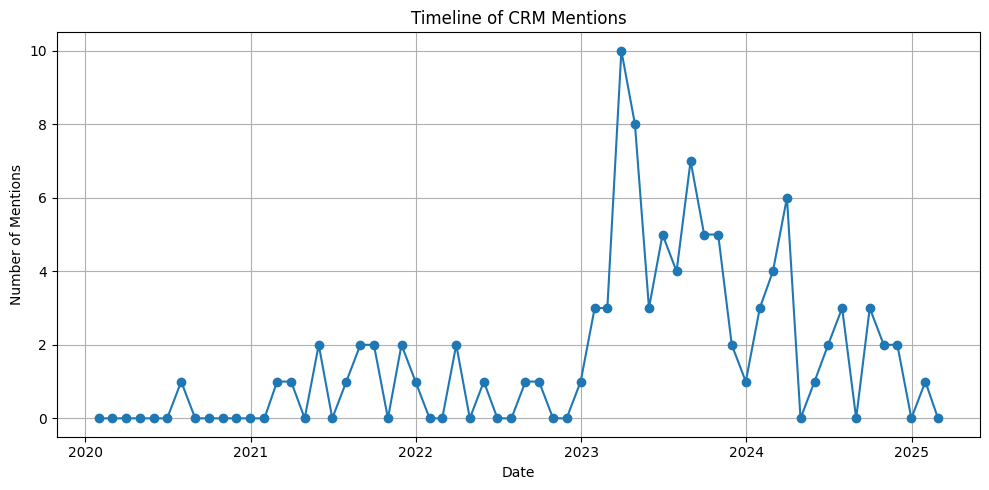

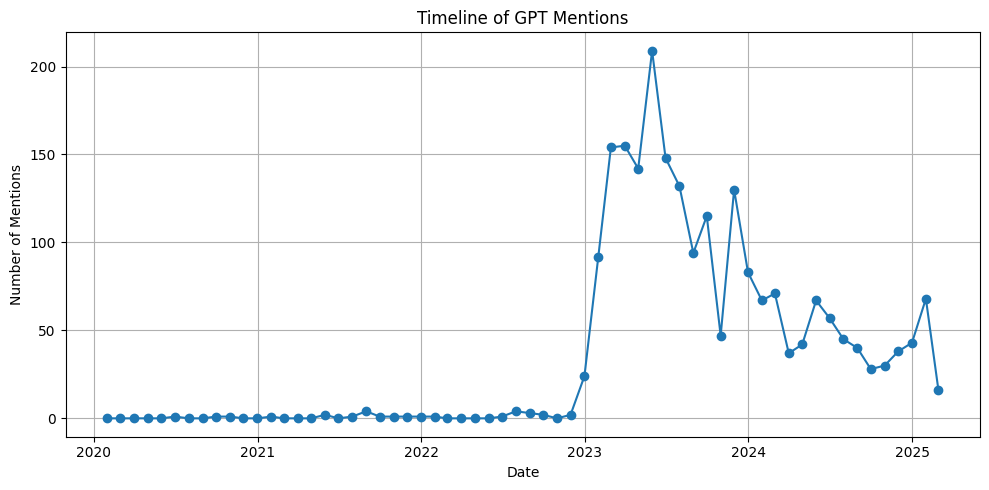

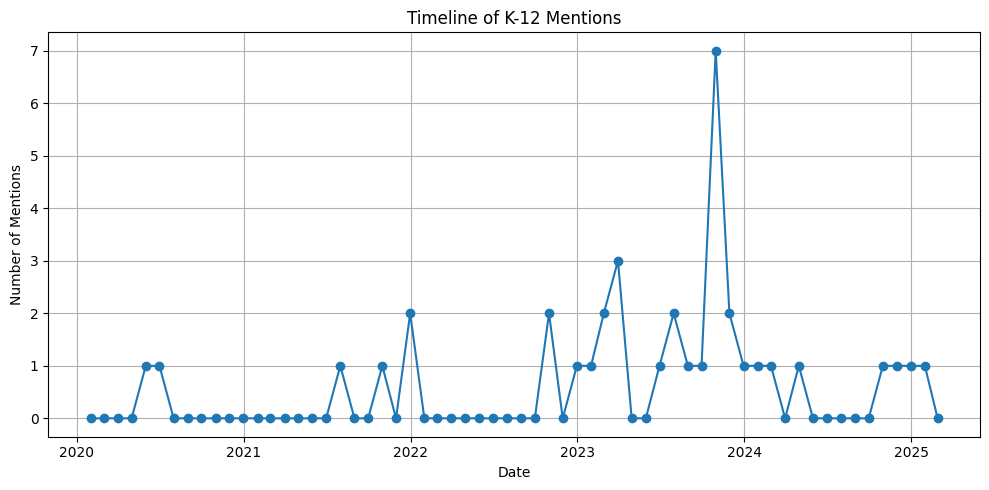

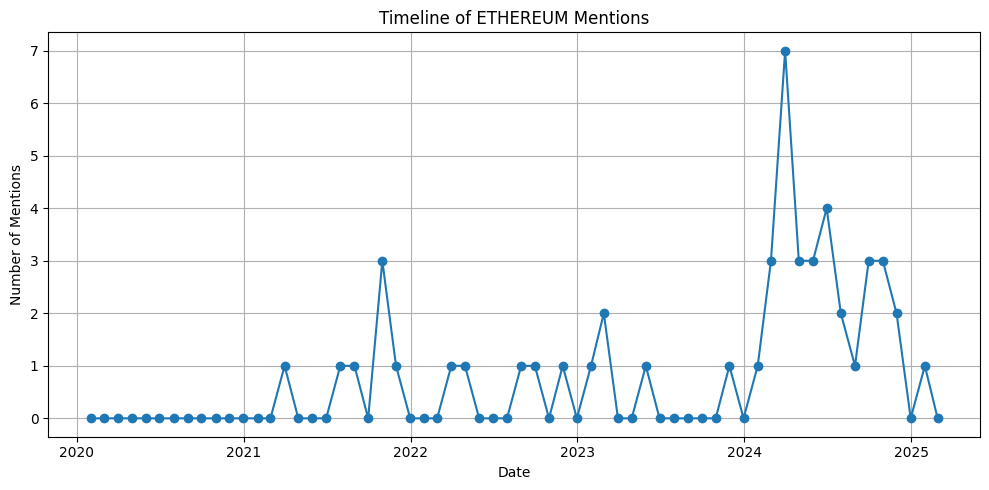

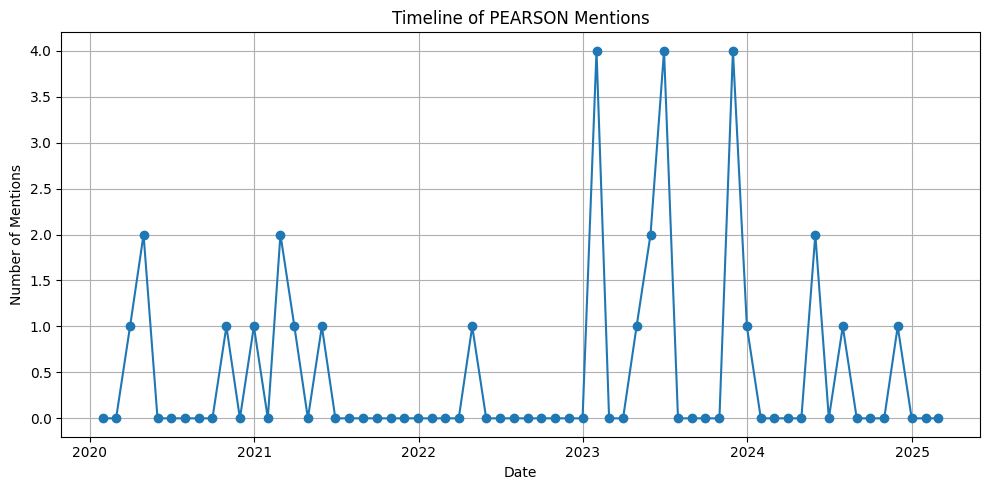

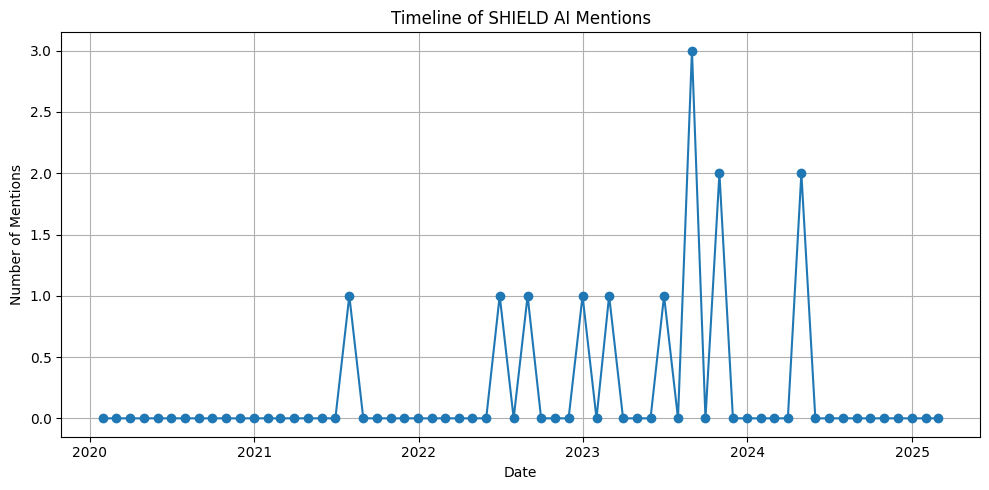

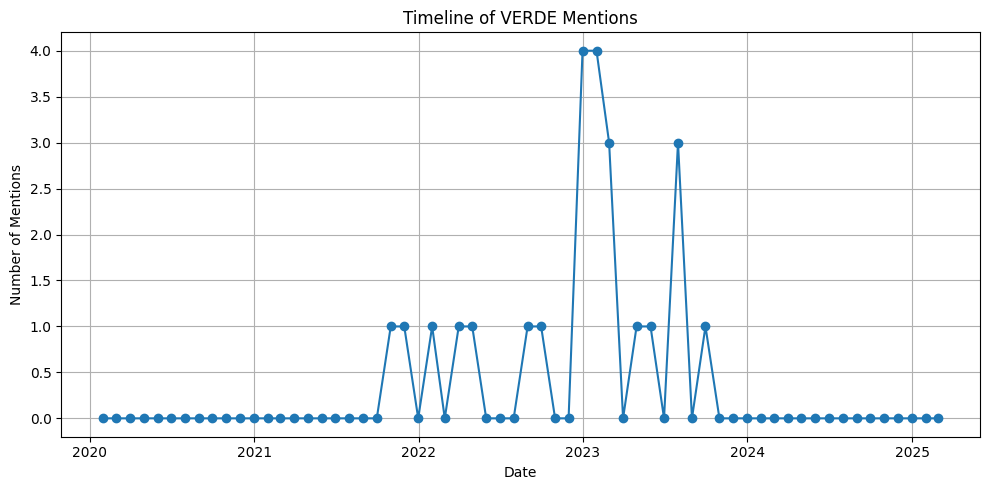

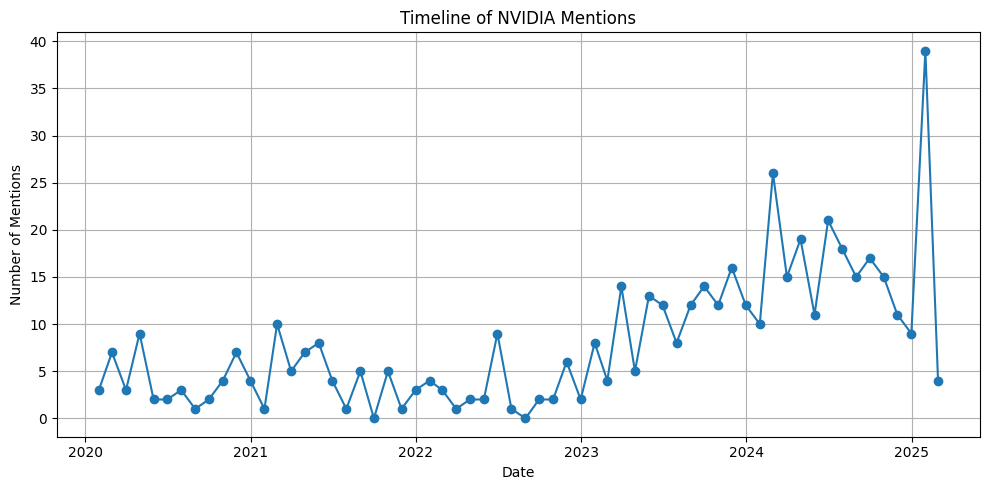

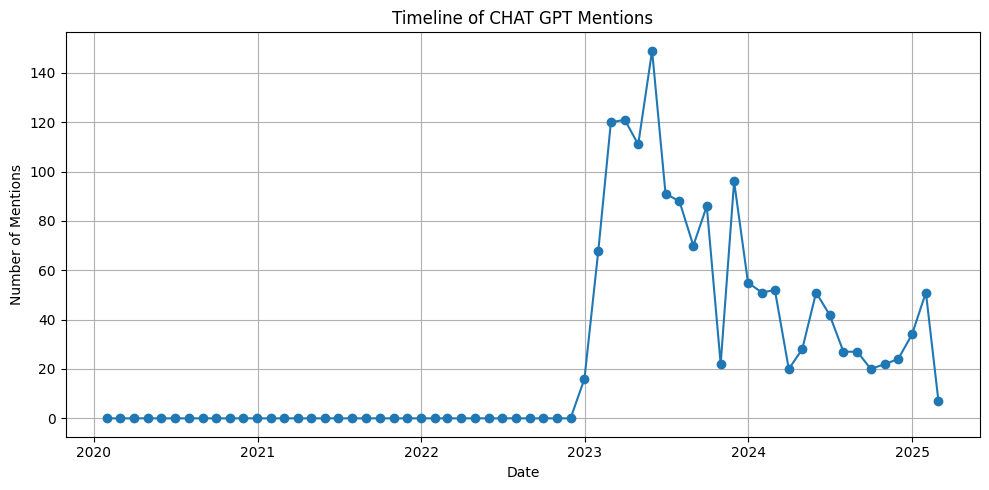

In [97]:
for tech in tech_list:
    df_aitopics[f"mentions_{tech}"] = df_aitopics["entities"].apply(lambda ents: 1 if contains_tech(ents, tech) else 0)

    # Group by month (using month-end 'ME') and sum the mentions for that technology
    tech_timeline = df_aitopics.groupby(pd.Grouper(key='date', freq='ME'))[f"mentions_{tech}"].sum()

    # Plot the timeline for that technology
    plt.figure(figsize=(10, 5))
    plt.plot(tech_timeline.index, tech_timeline.values, marker='o', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Number of Mentions")
    plt.title(f"Timeline of {tech.upper()} Mentions")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Accelerating AI Capabilities

In [98]:
entity_labels = ['PERSON', 'NORP', 'FAC', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'EVENT', 'WORK_OF_ART', 'LAW']

def extract_all_entities(text):
    doc = nlp(text)
    entities = {label: [] for label in entity_labels}
    for ent in doc.ents:
        if ent.label_ in entity_labels:
            entities[ent.label_].append(ent.text)
    # Remove duplicates by converting each list to a set then back to a list
    for label in entities:
        entities[label] = list(set(entities[label]))
    return entities

In [99]:
%%time

df_aitopics['entities_full'] = df_aitopics['textandtitle_clean'].parallel_apply(extract_all_entities)

CPU times: user 2.15 s, sys: 949 ms, total: 3.1 s
Wall time: 2min 51s


In [106]:
# df_aitopics.head()

df_aitopics.to_csv("df_subset_aitopics_ner.csv", index=False)

In [104]:
# new df to identify companies, academic institutions, gov't bodies
labels = ['FAC', 'ORG']
counters = {label: Counter() for label in labels}

for entities in df_aitopics['entities_full']:
    for label in labels:
        if label in entities:
            counters[label].update(entities[label])

top_groups = {label: [entity for entity, count in counters[label].most_common(50)] for label in labels}

max_len = max(len(lst) for lst in top_groups.values())

data2 = {}
for label in labels:
    padded = top_groups[label] + [""] * (max_len - len(top_groups[label]))
    data2[label] = padded

df_top_groups = pd.DataFrame(data2)
df_top_groups

,FAC,ORG
0,Cookie Settings,AI
1,DR REDDYS LABORATORIES,"Gray Television, Inc."
2,East Rock Road Allentown,PRNewswire
3,Aire Serv,Gray Media Group
4,Gemini,GPT
5,the White House,Chat GPT
6,the Road 13,Microsoft
7,Kingdom ofLiberia,"Gray Media Group, Inc."
8,Windows 11,Google
9,Capitol,FCC


### Sentiment Analysis

In [107]:
import matplotlib.pyplot as plt

In [ ]:
'''
Assuming you already computed sentiment scores in a column "sentiment_score", 
you can group by organizations. For example, to get average sentiment per organization:
'''

# First, explode the organization column to have one organization per row
df_orgs = df.explode('org_entities')
# Drop missing organization entries
df_orgs = df_orgs.dropna(subset=['org_entities'])

# Group by organization and calculate average sentiment
org_sentiment = df_orgs.groupby('org_entities')['sentiment_score'].mean().reset_index()
org_sentiment = org_sentiment.sort_values('sentiment_score', ascending=False)
print(org_sentiment.head(10))

In [ ]:
top_orgs = org_sentiment.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_orgs['org_entities'], top_orgs['sentiment_score'], color='skyblue')
plt.xlabel("Organization")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment for Top Organizations in AI Discussions")
plt.xticks(rotation=45)
plt.show()